# COMP90016 - Assignment 3
Version 1 Last edited 3/5/2024

## Semester 1, 2024

In [1]:
NAME = "Keziah Tikno"

ID = "1319716"

## Semester 1, 2023

This assignment should be completed by each student individually. Make sure you read this entire document, and ask for help if anything is not clear. Any changes or clarifications to this document will be announced via the LMS.

Please make sure you review the University's rules on academic integrity: https://academicintegrity.unimelb.edu.au/

You submission must be your own work. Do not copy material from other students, from the internet or from AI tools. 

Your completed notebook file containing all your answers will be turned in via Canvas. Please also submit an HTML file with the output cleared.

To complete the assignment, finish the tasks in this notebook.

The tasks are a combination of writing your own code, interpreting the results and answering related short-answer questions.

In some cases, we have provided test input and test output that you can use to try out your solutions. These tests are just samples and are **not** exhaustive - they may warn you if you've made a mistake, but they are not guaranteed to. It's up to you to decide whether your code is correct.

**Remember to save your work early and often.**

## Marking

Cells that must be completed to receive marks are clearly labelled. Some cells are code cells, in which you must complete the code to solve a problem. Others are markdown cells, in which you must write your answers to short-answer questions. 

Cells that must be completed to receive marks are labelled like this:

`# -- GRADED CELL (1 mark) - complete this cell --`

Some graded cells are code cells, in which you must complete the code to solve a problem. Other graded cells are markdown cells, in which you must write your answers to short-answer questions. 

You will see the following text in graded code cells:

```
# YOUR CODE HERE
raise NotImplementedError()
```

***You must remove the `raise NotImplementedError()` line from the cell, and replace it with your solution.***

Only add answers to graded cells. If you want to import a library or use a helper function, this must be included in a graded cell.

Only graded cells will be marked.
**Don't make changes outside graded cells, and don't add or remove cells from the notebook**.

>Word limits, where stated, will be strictly enforced. Answers exceeding the limit **will not be marked**.

>Run-time limits will be imposed for each coding question. The run-time of a code cell can be calculated by including `%time` at the top of your cell. Cells exceeding the run-time limit **will not be marked**. The run-time limits only apply to test cases that are included in this document.

No marks are allocated to commenting in your code. We do however, encourage efficient and well-commented code.

The total marks for the assignment add up to 100, and it will be worth 15% of your overall subject grade.

Part 1: 25 marks

Part 2: 40 marks

Part 3: 35 marks

## Submitting

Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student ID at the top of this notebook.


Your completed notebook file containing all your answers must be turned in via LMS in `.ipynb` format.
You must also submit a copy of this notebook in `html` format with the output cleared.
You can do this by using the `clear all output` option in the menu.

Your submission should include **only two** files with names formatted as: **Assignment_3.ipynb** and **Assignment_3.html**

## Overview

In this assignment, you will answer questions about multiple sequence alignment, phylogenetics and metagenomics.

You will use the `biopython` library in your functions. You may want to refer to sections of the documentation for additional help. Additional to `biopython` and standard Python 3 functions and methods, you may also use any other library we have used in Computational Genomics including `collections`, `numpy`, `pandas`, `math`, `itertools`, `seaborn` and `matplotlib`.


# Setup

In [2]:
import os
import requests
from IPython.core.display import HTML

# Function to get data. DO NOT MODIFY!
def fetch_file(url, outpath='.'):
    response = requests.get(url)
    if response.status_code == 200:
        print('File found!')
        # Get the filename from the URL
        filename = os.path.basename(url).split('?', 1)[0]
        # Construct the filepath using the specified directory and filename
        filepath = os.path.join(outpath, filename)
        # Create the directory if it doesn't exist
        if not os.path.exists(outpath):
            print(f'Creating output dir: {outpath}')
            os.makedirs(outpath)
        # Check if the file already exists in the specified directory
        if os.path.exists(filepath):
            print(f'{filename} already exists in {outpath}. Skip download.')
        else:
            with open(filepath, 'wb') as f:
                f.write(response.content)
                f.close()
            print(f'Saved to: {filepath}')
    else:
        print(f'File not found: Code {response.status_code}')

/Users/tiknokeziah/Desktop/Keziah/School/COMP90016/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Make the notebook pretty
HTML(requests.get('https://raw.githubusercontent.com/melbournebioinformatics/COMP90016/main/data/2023/style/custom.css').text)

In [4]:
# Fetch assignment data
f_names = ["comp90016_assignment_3_tree.nwk",
          "comp90016_assignment_3_aln.fasta"]

for filename in f_names:
    url = f'https://github.com/melbournebioinformatics/COMP90016/blob/main/data/2024/Assignment_03/data/{filename}?raw=true'
    fetch_file(url,'data')
  

File found!
comp90016_assignment_3_tree.nwk already exists in data. Skip download.
File found!
comp90016_assignment_3_aln.fasta already exists in data. Skip download.


## Part 1: Multiple sequence alignment

### Setup

We begin by using `biopython` to import an MSA of the *aphA-3* coding sequence from four different isolates of the bacterium *Enterococcus faecium* from a FASTA file.

In [5]:
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [6]:
# Import MSA into a Bio.Align.MultipleSeqAlignment object
fname = 'data/comp90016_assignment_3_aln.fasta'
seqs_aphA3 = AlignIO.read(fname, "fasta")
msa_aphA3 = MultipleSeqAlignment(seqs_aphA3)

# Print the number of aligned sequences
print(len(msa_aphA3))

# Print the alignment length
msa_aphA3.get_alignment_length()

4


786

In [7]:
# Create demo MSAs for test input
seqs_a = [SeqRecord(Seq('ACGT')), SeqRecord(Seq('AGGT')), SeqRecord(Seq('AC-T'))]
seqs_b = [SeqRecord(Seq('GCGGATATGGCGAT')), SeqRecord(Seq('GCAGATCTGGCGA-')), SeqRecord(Seq('GCGCATATTGCG--'))]

demo_msa_a = MultipleSeqAlignment(seqs_a)
demo_msa_b = MultipleSeqAlignment(seqs_b)

### Questions
In the cells below, complete the following tasks:

<div class="question">
<h3>Question 1.1</h3>
    
(5 marks, max 100 words)

The *Enterococcus faecium aphA-3* gene product confers resistance to the antibiotic kanamycin. Using the conding sequences provided, suggest why only isolate c is sensitive (not resistant) to kanamycin, despite having a copy of the *aphA-3* gene.

</div>


#### -- GRADED CELL (5 marks) - complete this cell -- 

Upon checking the sequence alignment of all the isolates in clustal, it was observed that isolate c contains two deletions. These deletions have the potential to cause a frameshift to the entire protein sequence because codons are composed of three bases. This disruption could be the reason why the kanamycin resistance gene aphA-3 is ineffective in isolate c, leading to its sensitivity to kanamycin. Isolate d also exhibits deletions, but they occur in a sequence of three, resulting in the absence of an amino acid. Despite this, the protein product of the aphA-3 gene remains functional.

<div class="info">
<h3> Question 1.2 </h3>

(5 marks)  
    
Scoring schemes are very important when comparing sequence alignments.

The Sum of Pairs (SP) score evaluates a multiple sequence alignment by examining each column and considering every possible pair of characters within that column. For each pair, a score is assigned, according to a predefined scoring system. This process is repeated for every column in the alignment. The scores for __all__ pairs in each column are then summed together to produce a total score for the alignment.
    
An example scoring system could be:

- Match (A|A) = 1

- Mismatch (A|T or A|-) = 0

- Aligned gaps (-|-) = 0 
 
<b>Challenge:</b> Write a python function to calculate the SP score for an MSA. 

- [ ] Input: 
    - a Bio.Align.MultipleSeqAlignment object (msa)
    - a match, mismatch and aligned_gap scores as integers.
- [ ] Output: an integer.
- [ ] If the Bio.Align.MultipleSeqAlignment object contains 2 or fewer sequences, return None.

</div>

In [8]:
# GRADED CELL 1.2 (5 marks, max 1 min run-time)
%time
from itertools import combinations

def sp_score(msa, match, mismatch, aligned_gap):
    """
    Calculate the SP score for an MSA. 
    Input: 
        - a Bio.Align.MultipleSeqAlignment object (msa)
        - a match, mismatch and aligned_gap scores as integers.
    Output: an integer.
    If the Bio.Align.MultipleSeqAlignment object contains 2 or fewer sequences, return None.
    """
    
    # YOUR CODE HERE
    count = 0

    num_seq = len(msa)
    length = msa.get_alignment_length()
    
    for col in range(length):
        base = msa[:,col]
        
        for p1,p2 in combinations(base, 2):
            if p1 != '-' and p2 != '-' and p1==p2:
                count += match
            elif p1 == '-' and p2 == '-':
                count += aligned_gap
            else:
                count += mismatch

    return count

CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 4.77 µs


In [9]:
# Test your function in this cell
print(sp_score(demo_msa_a, 1, 0, 0)) # should output 8
print(sp_score(demo_msa_b, 1, 0, 0)) # should output 29

print(sp_score(msa_aphA3, 1, 0, 0))

8
29
4683


In [10]:
# --- AUTOGRADING CELL DO NOT EDIT ----


<div class="info">
<h3> Question 1.3 </h3>

(5 marks)  
    
An alternate scoring system is the minimum entropy score, which assesses the quality of a multiple sequence alignment by calculating a score for each column in the alignment. The score for each column is derived using the following entropy-based formula.
    
# <center>$-\sum _i c_i \times log_2(\frac{c_i}{C})$</center>    

Where $c_i$ is the number of occurrences of character $i$ in a column and $C$ is the number of sequences in the MSA.
    
The score for each column reflects the diversity of characters at that position; a completely conserved column (where all characters are the same) yields a score of 0. The total alignment score is calculated by summing the scores from all columns. With this scoring system, a lower score indicates a better alignment.

<b>Challenge:</b> Write a python function to calculate the minimum entropy score for an MSA.

- [ ] Input: a Bio.Align.MultipleSeqAlignment object (msa).
- [ ] Output: a floating point number (no rounding).
- [ ] If the Bio.Align.MultipleSeqAlignment object contains 2 or fewer sequences, return None.
- [ ] Treat a gap the same as any other character.

</div>

In [11]:
# GRADED CELL 1.3 (5 marks, max 1 min run-time)
%time
import math
from collections import Counter
def mes_score(msa):
    """
    Calculate the minimum entropy score for an MSA. 
    Input: a Bio.Align.MultipleSeqAlignment object (msa).
    Output: a floating point number.
    If the Bio.Align.MultipleSeqAlignment object contains 2 or fewer sequences, return None.
    Treat a gap the same as any other character.
    """
    
    # YOUR CODE HERE
    count = 0

    num_seq = len(msa)
    length = msa.get_alignment_length()
    
    for col in range(length):
        base = msa[:,col]
        base_dict = Counter(base)
    
        for key,value in base_dict.items():
            
            formula = -(value * math.log2(value / num_seq))
            count += formula

    return round(count, 2)

CPU times: user 5 µs, sys: 4 µs, total: 9 µs
Wall time: 31.9 µs


In [12]:
# Test your function in this cell
print(mes_score(demo_msa_a)) # should output ~ 5.51
print(mes_score(demo_msa_b)) # should output ~ 16.53

print(mes_score(msa_aphA3))

5.51
16.53
32.23


In [13]:
# --- AUTOGRADING CELL DO NOT EDIT ----


<div class="question">
<h3>Question 1.4</h3>
    
(10 marks, max 100 words)

If you were going to choose one of these scoring systems to use in an MSA tool, which would you choose? Justify your choice with reference to the algorithms.

</div>


#### -- GRADED CELL (10 marks) - complete this cell -- 

If the goal is to pinpoint conserved areas or functional motifs, opting the minimum entropy score is ideal. This metric focuses solely on the degree of conservation or divergence among the sequences, disregarding the specific bases involved. It is shown in how the formula calculates the score. It just takes each character's occurrences and count it. Conversely, for tasks like assessing pairwise difference in phylogenetic studies or detecting mutations, the SP score is better suited. It penalises mismatches and gaps based on the sequence bases, providing a more nuanced evaluation.

## Part 2: Phylogenetics

The questions in part two relate to [this 2021 paper](https://www.sciencedirect.com/science/article/abs/pii/S1055790321001147)  

>Esquerré, D., Donnellan, S. C., Pavón-Vázquez, C. J., Fenker, J. & Keogh, J. S. Phylogeography, historical demography and systematics of the world’s smallest pythons (Pythonidae, Antaresia). Molecular Phylogenetics and Evolution 161, 107181 (2021).

?≥We will also be using `biopython` to read in phlogenetic trees as `Newick.Tree` objects.

In [14]:
from Bio import Phylo

The Newick file we will be using includes a phylogenetic tree of the mitochondrial cytochrome b genes from a subset of the  *Antaresia* samples. 

In [15]:
# Import the gene tree.
cyt_b_tree = Phylo.read("data/comp90016_assignment_3_tree.nwk", "newick")
cyt_b_tree.root_at_midpoint()
#print(cyt_b_tree)

### Questions
In the cells below, complete the following tasks:

<div class="question">
<h3>Question 2.1</h3>

(5 marks, max 50 words)
    
Suggest why *Morelia bredli* was used as an outgroup in the phylogenetic analyses. 

</div>


-- GRADED CELL (5 marks) - complete this cell --

Because Morelia is a distantly related species and to study evolutionary distances more accurately within Pythonidae and Antaresia. It will help to estimate the divergence times and evolutionary rates while clarifying the branching patterns in the evolutionary history of Pythonidae and Antaresia species. 

<div class="question">
<h3>Question 2.2</h3>

(5 marks, max 50 words)

Suggest why the mitochondrial cytochrome b gene was selected for the analysis. 
</div>


-- GRADED CELL (5 marks) - complete this cell --

Cytochrome b has been extensively sequenced across different species, resulting in a large database of cytb sequences. The variability of cytb makes it most useful for comparing species in the same genus or same family. Additionally, it is highly conserved gene that present in all animals.

<div class="question">
<h3>Question 2.3</h3>
    
(5 marks, max 100 words)

Suggest why monomorphic SNPs and SNPs with low read depth were removed. 
</div>


-- GRADED CELL (5 marks) - complete this cell --

Monomorphic SNPs are SNPs that are shared by all individuals in a population and don't contribute meaningful information to genetic diversity when assessing evolutionary relationships. SNPs with low read depth are unreliable due to inadequate sequencing coverage, which can result in higher error rates during SNP calling and challenges in determining the true genotype accurately. Both monomorphic SNPs and low read depth are less likely to have significant functional or evolutionary relevance, such as associations with adaptive traits, population differentiation, or other biologically important factors, compared to polymorphic SNPs with higher read depth.

<div class="question">
<h3>Question 2.4</h3> 

(5 marks, max 100 words)
    
`IQ-tree` was used for treebuilding with the cytochrome b sequences. Many computational genomics tools including `IQ-tree` use algorithms that are not deterministic; they can produce different outputs on repeated runs with the same input. 

Explain why this is a challenge for reproducibility and how this can be addressed by users. 

</div>


-- GRADED CELL (5 marks) - complete this cell --

Reproducibility refers to the ability to obtain consistent results when an experiment is repeated. This can be achieved by initializing a seed value for the random number generator, ensuring the same sequence of random numbers is generated each time the algorithm is run. It is also crucial to use the same software version and any dependencies in the analysis, as different versions may have variations in algorithms or default settings. Additionally, performing validation checks and sensitivity analyses are also crucial. Lastly, proper documentation of the pipeline and code scripts is important for transparency and reproducibility.

<div class="info">
<h3> Question 2.5 </h3>

(10 marks, max 1 min run-time)

Colless’ imbalance ($I_{c}$) is a metric that relates to the shape (or balance) of phylogenetic trees. It is calculated according to the following formula:


# <center>$I_{c}=\frac{ \sum_{InteriorNodes} |T_{R}-T_{L}| }{ \frac{(n-1)(n-2)}{2} }$</center>

Where: 
* $T_{R}$ and $T_{L}$ are the number of taxa descended from the right and left branches respectively, of an interior node. 
* The interior nodes are all the nodes (including the root) that are not tips. 
* *n* is the total number of taxa in the tree (including tips). 
* *(n-1)(n-2)/2* is the maximum possible value of the numerator, therefore the value of $I_{c}$ ranges from 0 to 1.

Write a Python function to calculate the Colless’ imbalance of a phylogenetic tree. 
    
- [ ] Input: a Newick.Tree object containing a rooted binary tree (tree).
- [ ] Assume every node in tree has either 0 children or 2 children. 
- [ ] Return a floating-point number (no rounding). 
- [ ] If tree contains fewer than 3 nodes, return None.
</div>

In [16]:
# GRADED CELL 2.5 (10 marks, max 1 min run-time)

def colless_imbalance(tree):
    """
    Calculate the Colless’ imbalance of a phylogenetic tree.
    Input: a Newick.Tree object containing a rooted binary tree (tree).
    Assume every node in tree has a unique name and has either 0 children or 2 children.
    Return a floating-point number.
    If tree contains fewer than 3 nodes, return None.
    """
   
    # YOUR CODE HERE
    n = len(list(tree.find_clades(order='level')))
    internal_nodes = tree.get_nonterminals()

    if n > 3:
        numerator = 0
        denominator = (n-1) * (n-2) / 2
        
        for taxa in internal_nodes:
            child = taxa.clades
            right_clade = counting_taxa(child[0])
            left_clade = counting_taxa(child[1])

            internal_count = abs(right_clade - left_clade)
            
            numerator += internal_count

        I_c = numerator / denominator

    else:
        return None
        
    return I_c

def counting_taxa(node):
    children = node.clades
    count = 0
    
    if len(children) != 0:
          
        count += counting_taxa(children[0])
        count += counting_taxa(children[1])

    return count + 1

demo_tree_a


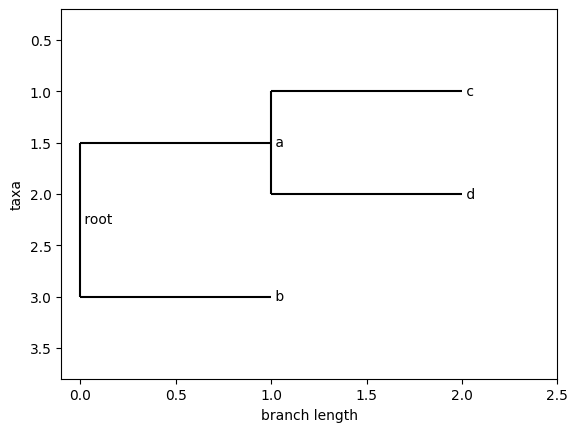

This tree has 5 taxa (including root) and 2 internal nodes.

Colless Imbalance for demo_tree_a is: 0.3333333333333333
27.6 µs ± 536 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [17]:
# Test your function in this cell

# Create a demo tree
from io import StringIO
demo_tree_a = Phylo.read(StringIO("((c,d)a,b)root;"), "newick")

# Inspect the tree
print("demo_tree_a")
Phylo.draw(demo_tree_a)
print("This tree has 5 taxa (including root) and 2 internal nodes.\n")

# Check expected output on demo data
print(f'Colless Imbalance for demo_tree_a is: {colless_imbalance(demo_tree_a)}') # Should output 0.3333...

# Test the function run time
%timeit colless_imbalance(demo_tree_a) 

# Write your own tests here:

In [18]:
# --- AUTOGRADING CELL DO NOT EDIT ----


<div class="info">
<h3> Question 2.6 </h3> 

(10 marks, max 1 min run-time)

A phylogenetic tree can be stored in Newick format in several non-unique arrangements. Aside from topology, Newick files can also store branch length and branch support information. 

Write a Python function that determines whether a group of phylogenetic trees has a common, identical topology. 

- [ ] Input: a list of Newick.Tree objects (tree_list). 
- [ ] Assume the trees are rooted binary trees where every node in tree has either 0 children or 2 children. 
- [ ] Return the Boolean value True if all the trees in tree_list share an identical topology.
- [ ] Return the Boolean value False if they do not.
- [ ] If tree_list contains fewer than 2 Newick.Tree objects, return None.
</div>

In [19]:
# GRADED CELL 2.6 (10 marks, max 1 min run-time)

# Optional import
from itertools import combinations

def common_topology(tree_list):
    """
    Determine whether a group of phylogenetic trees has a common, identical topology. 
    Input: a list of Newick.Tree objects (tree_list).
    Assume the trees are rooted binary trees where every node in tree has either 0 children or 2 children. 
    Return the Boolean value True if all the trees in tree_list share an identical topology.
    Return the Boolean value False if they do not.
    If tree_list contains fewer than 2 Newick.Tree objects, return None.
    """
    
    # YOUR CODE HERE
    if len(tree_list) > 1:

        topology_list = []
        for tree in tree_list:
            root = list(tree.find_clades(order='level'))[0]
            topology_tree = topology(root)
            topology_list.append(topology_tree)

        first_tree = topology_list[0]

        for tree in topology_list[1:]:
            if tree != first_tree:
                return False
        return True
    else:
        return None


def topology(node):
    if node.is_terminal():
        return node

    else:
        left_branch = topology(node.clades[0])
        right_branch = topology(node.clades[1])
        
    return tuple((node,(left_branch, right_branch)))

demo_tree_a


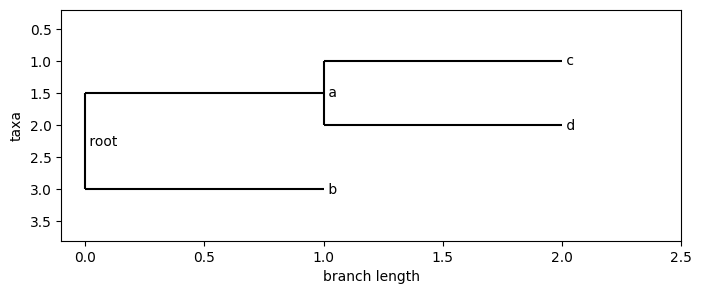

demo_tree_b


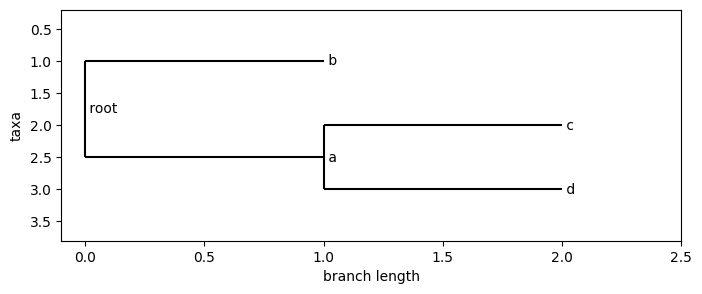

demo_tree_c


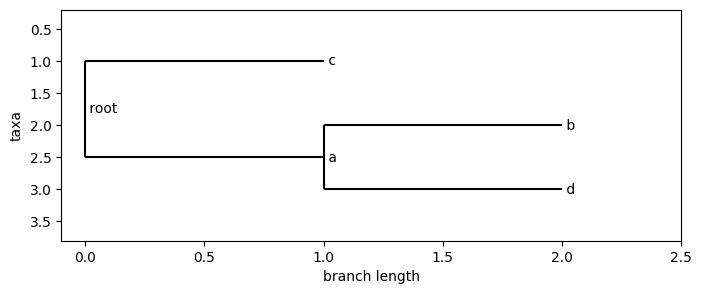

False
False
36.4 µs ± 2.16 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [20]:
# Test your function in this cell

# Create some more demo trees
demo_tree_b = Phylo.read(StringIO("(b,(c,d)a)root;"), "newick")
demo_tree_c = Phylo.read(StringIO("(c,(b,d)a)root;"), "newick")

# Inspect the trees
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 3)

print("demo_tree_a")
Phylo.draw(demo_tree_a)

print("demo_tree_b")
Phylo.draw(demo_tree_b)

print("demo_tree_c")
Phylo.draw(demo_tree_c)

# Check expected output on demo data
print(common_topology([demo_tree_a, demo_tree_b])) # should output True
print(common_topology([demo_tree_a, demo_tree_c])) # should output False

# Test the function run time
%timeit common_topology([demo_tree_a, demo_tree_b])

# Write your own tests here:


In [21]:
# --- AUTOGRADING CELL DO NOT EDIT ----


## Part 3: Metagenomics

### Setup

`Kraken2` is a tool used to assign taxonomic labels to metagenomic readsets. Output from `Kraken2` was used in workshop 10. 

`Kraken2` is described in the publication below. Please read it before answering the questions.

>https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1891-0

Its predecessor `Kraken` is described here.

>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4053813/pdf/gb-2014-15-3-r46.pdf


### Questions
In the cells below, complete the following tasks:

<div class="question">
<h3>Question 3.1</h3>

(20 marks, max 50 words)
    
In your own words, describe the method used by `Kraken2` to assign a taxonomic classification to each read in a metagenomic readset. Include a description of the database and the classification tree. Include each of the main steps of the algorithm. 

</div>


-- GRADED CELL (20 marks) - complete this cell --

Kraken2 assigns taxonomic labels to DNA sequences and operates by examining the k-mers within a query sequence to the database. The steps are:
1. K-mer examination: Kraken2 starts by examining the k-mers within a query sequence
2. Database query: The information within these k-mers is used to query a database. This database maps k-mers to the LCA of all genomes known to contain a given k-mer.
3. Minimizer selection: minimizer is the lexicographically smallest k-mer in a window of k-mers. Use minimizers of the k-mers in the query sequences as database queries. Similarly, minimizers used for reference sequences in teh database's genomic library are stored in the database.
4. LCA assignment: All k-mers are considered to have the same LCA as their minimizer's database LCA value.
5. Hash table utilization: Kraken2 uses a compact hash table, a probabilistic data structure. That means that occasionally, database queries will fail by either returning the wrong LCA or by not resulting in a search failure when a queried minimizer was never actually stored in the database.
6. Classification: each read in the metagenomic readset is assigned to a taxonomic classification based on the LCAs of its k-mers.

<div class="question">
<h3>Question 3.2</h3>

(5 marks, max 50 words)

What is the main limitation to using `Kraken2` to estimate the microbial diversity of a previously unsampled environment?
    
</div>


-- GRADED CELL (5 marks) - complete this cell --

Because Kraken2's classification accuracy depends heavily on the comprehensiveness and quality of the reference databases it uses. Microbial species or strains that are not well-represented or absent in the database may be misclassified or failed to classify them, leading to an incomplete or biased estimation of the microbial diversity.

<div class="question">
<h3>Question 3.3</h3>
    
(10 marks, max 100 words)

Explain how Kraken2 achieves high classification accuracy while minimising memory usage.
    
</div>


-- GRADED CELL (10 marks) - complete this cell --

Kraken2 uses a probabilistic, compact hash table to map minimizers to LCAs, consuming only one-third of the memory required by a standard hash table. Unlike Kraken1, which stores all k-mers, Kraken2 stores only minimizers (substrings of length L, L <= k) from the reference sequence library. During classification, Kraken2 compares these minimizers (L-mers) against the reference set, not the k-mers. This reduces the memory footprint. Additionally, Kraken2 implements a hash-based subsampling technique that reduces the set of minimizer/LCA pairs in the table, allowing users to specify a target hash table size. This approach reduces memory usage and speeds classification up. 

# END OF ASSIGNMENT

## Submitting

Follow these steps to submit your assignment

1) Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

2) Make sure you have filled in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"

3) **Clear all output** (in the menubar, select Kernel$\rightarrow$Restart & Clear Output)

4) Your completed notebook file containing all your answers must be turned in via Canvas in `.ipynb` format.

5) You must also submit a copy of this notebook in `html` format with the output cleared.


Your submission should include **only two** files with names formatted as: **Assignment_3.ipynb** and **Assignment_3.html**
